# Module und Pakete erstellen  
**Quelle:** https://openbook.rheinwerk-verlag.de/python/38_002.html  

**siehe auch:** https://packaging.python.org/en/latest/tutorials/packaging-projects/
## Schreiben des Moduls
Rufen Sie sich noch einmal ins Gedächtnis, dass es einen Unterschied zwischen einem Modul und einem Paket gibt. Während ein Modul aus nur einer Programmdatei besteht, ist ein Paket ein Ordner, der mehrere Untermodule oder -pakete enthalten kann. Ein Paket erkennt man an der Programmdatei __init__.py im Paketverzeichnis. Die Unterscheidung der Begriffe »Modul« und »Paket« wird beim Erstellen des Installationsskripts noch eine Rolle spielen.

An dieser Stelle wird das Beispielmodul entwickelt, auf das wir uns im gesamten Kapitel beziehen werden. Dabei handelt es sich um ein sehr einfaches Modul, das die grundlegende Funktionalität von setuptools demonstriert. Bemerkungen zu komplexeren Distributionen, die beispielsweise Pakete oder Ähnliches enthalten, finden Sie an der jeweiligen Stelle im Text.

Sinn und Zweck des Beispielmoduls ist es, einen beliebigen Text so zu verändern, dass er sich ähnlich wie dieser liest:

Nach eienr Stidue der Cmabridge Uinverstiaet ist es eagl, in wlehcer Reiehnfogle die Bchustebaen in Woeretrn vokrmomen.

Es ist nur withcig, dsas der ertse und lettze Bchusatbe an der ricthgien Stlele snid. Der Rset knan total falcsh sein, und man knan es onhe Porbelme leesn.

Das ist so, wiel das mneschilche Geihrn nihct jeedn Bchustbaen liset, sodnern das Wrot als Gaznes.

Das Modul stellt dabei eine Funktion verwirble_text bereit, die einen String übergeben bekommt und diesen dann so »verwirbelt« zurückgibt, dass nur der erste und letzte Buchstabe sicher auf ihrem Platz bleiben.



In [ ]:
#%%writefile 
import random
def verwirble_text(text):
    liste = []
    for wort in text.split():
        w = list(wort[1:-1]) 
        random.shuffle(w) 
        liste.append(wort[0] + "".join(w) + wort[-1]) 
    return " ".join(liste)

Die Funktion iteriert in einer Schleife über alle im übergebenen String enthaltenen Wörter. Bei jedem Schleifendurchlauf wird aus dem jeweiligen Wort der Teil-String extrahiert, der verwirbelt werden soll. Dabei wird sichergestellt, dass der erste und der letzte Buchstabe nicht in diesen Teil-String mit aufgenommen werden. Zum Verwirbeln der Buchstaben wird die Funktion shuffle des Moduls random verwendet. Schließlich werden der verwirbelte String, der Anfangsbuchstabe und der Endbuchstabe zusammengefügt und an die Liste der erzeugten Wörter liste angehängt. Am Schluss wird diese Wortliste zu einem Text zusammengefügt und zurückgegeben.

Die Funktion geht der Einfachheit halber von einem gutartigen String aus. Das bedeutet insbesondere, dass der String keine Satzzeichen enthalten sollte.

Im Folgenden soll nun eine Distribution des Moduls verwirbeln erstellt werden, damit auch andere Python-Programmierer möglichst komfortabel in den Genuss dieses überaus mächtigen Werkzeugs gelangen können.

In [ ]:
from setuptools import setup
setup(
    name = "verwirbeln",
    version = "1.0",
    author = "Rheinwerk",
    author_email = "z.schaaf@bbq.de",
    py_modules = ["verwirbeln"]
    )

Dieser Funktion übergeben wir verschiedene Schlüsselwortparameter, die Informationen über das Modul enthalten. Zusätzlich bekommt die Funktion über den Parameter py_modules alle Programmdateien übergeben, die der Distribution angehören sollen. Auf diese Weise ist es auch möglich, mehrere selbst geschriebene Module in einer Distribution anzubieten.

Das ist tatsächlich schon alles. Diese Programmdatei kann jetzt dazu verwendet werden, das Modul auf einem beliebigen Rechner mit Python-Installation zu installieren oder eine Distribution des Moduls zu erstellen. Wie das im Einzelnen funktioniert, klären wir später, zunächst betrachten wir die Funktion setu
setuptools.setup({arguments}) Die Funktion setup des Pakets setuptools muss in der Programmdatei setup.py aufgerufen werden und stößt den jeweils gewünschten Installationsprozess an. Dazu müssen Sie der Funktion verschiedene Schlüsselwortparameter übergeben, die Informationen über das Modul bzw. Paket bereitstellen. Tabelle 38.1 listet die wichtigsten möglichen Argumente auf und klärt kurz ihre Bedeutung. Wenn nichts anderes angegeben ist, handelt es sich bei den jeweiligen Parametern um Strings.  
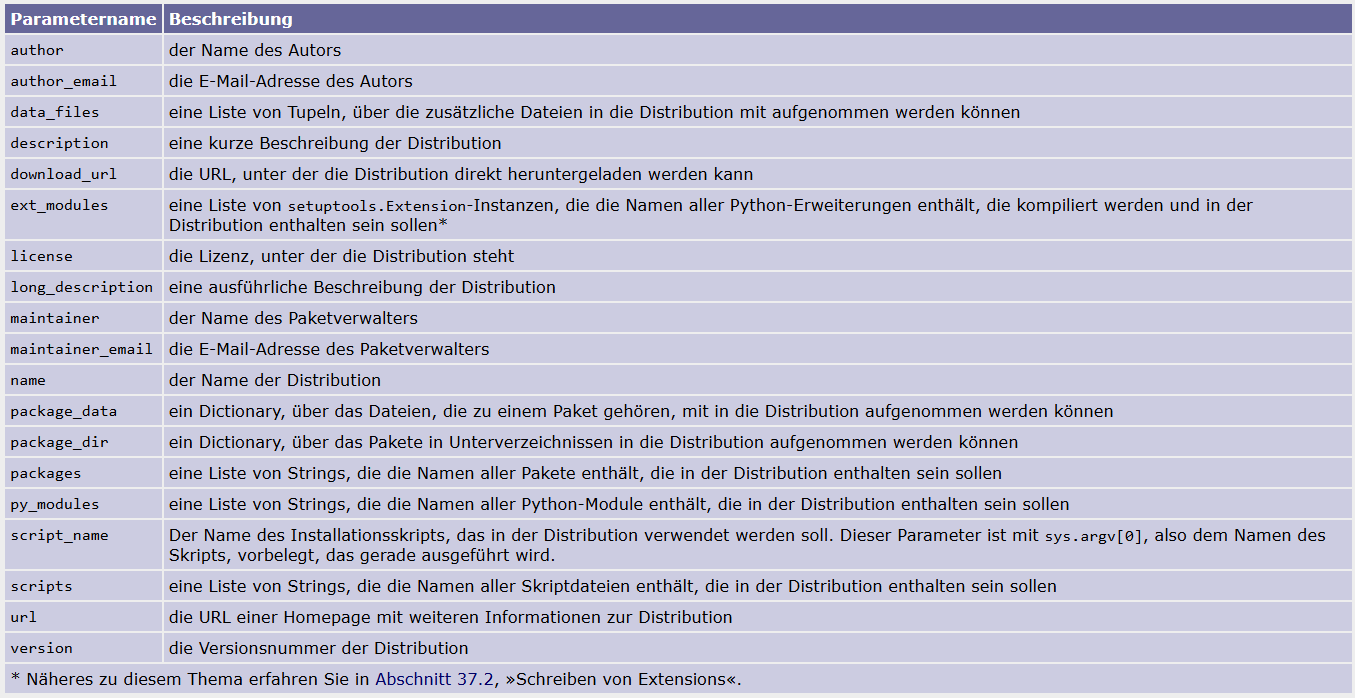

## Distribution von Paketen  
Wenn Ihr Projekt anstelle einzelner Module aus einem oder mehreren Paketen besteht, müssen Sie die Namen aller Pakete, die in die Distribution aufgenommen werden sollen, über den Schlüsselwortparameter packages angeben:

In [ ]:
from setuptools import setup
setup(
    […]
    packages = ["paket1", "paket2", "paket1.unterpaket1"]
    )

In diesem Fall werden die Pakete paket1 und paket2, die sich im Hauptverzeichnis befinden müssen, in die Distribution aufgenommen. Zusätzlich wird noch das Paket unterpaket1 aufgenommen, das sich innerhalb des Pakets paket1 befindet. Sie können durchaus sowohl Pakete über packages als auch einzelne Module über py_modules in die Distribution aufnehmen.

Oftmals existiert im Hauptordner neben dem Installationsskript ein Ordner src oder source, in dem sich dann die Module oder Pakete der Distribution befinden. Um solch einen Unterordner im Installationsskript bekannt zu machen, übergeben Sie den Schlüsselwortparameter package_dir beim Aufruf von setup:

In [ ]:
from setuptools import setup
setup(
    […]
    package_dir = {"" : "src"},
    packages = ["paket1", "paket2", "paket1.unterpaket1"]
    )

## Distribution von Skriptdateien
Neben Modulen und Paketen gehören möglicherweise weitere Dateien zu Ihrem Projekt und sollten damit auch Platz in der Distribution finden. Dazu zählen zunächst einfache Skriptdateien. Diese implementieren beispielsweise ein Tool, das im Zusammenhang mit Ihrem Paket steht. Der Unterschied zwischen einem Modul und einer Skriptdatei ist, dass das Modul selbst keinen Python-Code ausführt, sondern nur Funktionen oder Klassen bereitstellt, während eine Skriptdatei ein lauffähiges Programm enthält. Das distutils-Paket installiert Skriptdateien in ein Verzeichnis, in dem sie systemweit ausführbar sind. (Unter Windows ist das der Unterordner Scripts der Python-Installation, unter Linux das Verzeichnis /usr/bin. )

Solche Skriptdateien können beim Aufruf von setup durch den Schlüsselwortparameter scripts übergeben werden. Dabei muss für scripts, wie für andere Parameter auch, eine Liste von Strings übergeben werden, die jeweils einen Dateinamen enthalten.

Ein kleiner Service, den das Paket setuptools in Bezug auf Skriptdateien durchführt, ist das automatische Anpassen der Shebang-Zeile an das Betriebssystem, auf dem die Distribution installiert wird.

## Distribution von Ressourcen
Die nächste Kategorie zusätzlicher Dateien sind Ressourcen, die von bestimmten Paketen benötigt werden und in diesen enthalten sind. Beispielsweise erfordert das Paket paket1 die beiden Dateien hallo.txt und welt.txt. In einem solchen Fall können diese Dateien über den Schlüsselwortparameter package_data in Form eines Dictionarys übergeben werden:

In [ ]:
setup(
    […]
    packages = ["paket1", "paket2", "paket1.unterpaket1"],
    package_data = {"paket1" : ["hallo.txt", "welt.txt"]}
    )

Anstatt jede Datei einzeln anzugeben, können auch Wildcards verwendet werden. So würde der Wert ["*.txt"] alle Textdateien einbinden, die sich im Verzeichnis des Pakets paket1 befinden.

**Hinweis:**  
*Sie sollten Ordner innerhalb eines Pfades immer durch einen einfachen Slash (/) voneinander trennen. Das Paket setuptools kümmert sich dann um die korrekte »Übersetzung« des Pfades in das Format des jeweiligen Betriebssystems.*

## Abhängigkeiten
Sollte Ihre Software Abhängigkeiten zu anderen Paketen haben, können Sie diese über den Schlüsselwortparameter install_requires angeben:

In [ ]:
setup(
    […]
    install_requires = ['paket>=1.0']
    )

In diesem Fall setzt die Installation der Software die Installation des Pakets paket in einer Version größer als 1.0 voraus. Wenn die Installation mit einem Paketmanager wie pip oder EasyInstall durchgeführt wird, kann das Paket paket jetzt automatisch aus dem Python Package Index heruntergeladen und installiert werden, sofern es dort vorhanden ist.

Sollte eine Abhängigkeit zu einem Paket notwendig sein, das nicht im Package Index enthalten ist, können Sie über den Schlüsselwortparameter dependency_links eine Liste von URLs angeben, unter denen nach unbekannten Paketen gesucht wird.

# Erstellen einer Quellcodedistribution  

Nachdem Sie das Installationsskript geschrieben haben, können Sie mit dessen Hilfe eine Quellcodedistribution Ihrer Software erstellen. Dazu wechseln Sie in das Verzeichnis, in dem das Installationsskript liegt, und führen es mit dem Argument sdist aus:
```
setup.py sdist
```
Dieser Befehl erzeugt die Quellcodedistribution im Unterordner dist nach dem Namensschema Projektname-Version.Format. Dabei können Sie das Format des Archivs über die Option --formats festlegen. Es ist zudem möglich, eine Distribution in mehreren Archivformaten zu erstellen:
```

setup.py sdist --formats=zip,gztar
```
Mögliche Werte sind dabei zip für ein ZIP-Archiv (*.zip), gztar für ein gz-komprimiertes TAR-Archiv (*.tar.gz), bztar für ein bz2-komprimiertes TAR-Archiv (*.tar.bz2), xztar für ein xz-komprimiertes TAR-Archiv (*.tar.xz), ztar für ein Z-komprimiertes TAR-Archiv (*.tar.Z) sowie tar für ein unkomprimiertes TAR-Archiv. Wenn die Option ‐‐formats nicht angegeben wurde, wird unter Windows ein ZIP-Archiv und unter Unix-Systemen ein gz-komprimiertes TAR-Archiv erstellt.

In das Archiv werden alle Dateien aufgenommen, die im Installationsskript eingetragen wurden. Zusätzlich wird eine Datei namens README oder README.txt automatisch in das Archiv mit aufgenommen, sofern eine solche im selben Ordner wie das Installationsskript existiert.

Das resultierende Archiv, die Quellcodedistribution, kann jetzt veröffentlicht und verbreitet werden. Der Benutzer, der diese Distribution herunterlädt, kann Ihr Modul bzw. Ihr Paket so installieren, wie es in Abschnitt »Distributionen installieren«, beschrieben ist.

# Erstellen einer Binärdistribution  

Neben einer Quellcodedistribution ist das Erstellen einer Binärdistribution von besonderem Interesse, da diese den wenigsten Installationsaufwand hat. Umgekehrt bedeutet es allerdings mehr Arbeit für Sie, da für verschiedene Betriebssysteme unter Umständen unterschiedliche Formate für Binärdistributionen erstellt werden müssen. Das prominenteste dieser Formate ist ein Windows-Installer, aber auch RPM-Pakete für RPM-basierende Linux-Distributionen (Dies sind unter anderem Red Hat, Fedora, SUSE und Mandriva. ) und Python Eggs können erstellt werden.

Beachten Sie, dass Sie neben einer Binärdistribution stets auch eine Quellcodedistribution Ihres Projekts veröffentlichen sollten, da es Betriebssysteme gibt, die weder mit einem RPM-Paket noch mit einem Windows-Installer etwas anfangen können.

Zum Erzeugen einer Binärdistribution wird das Installationsskript mit den folgenden Argumenten aufgerufen:

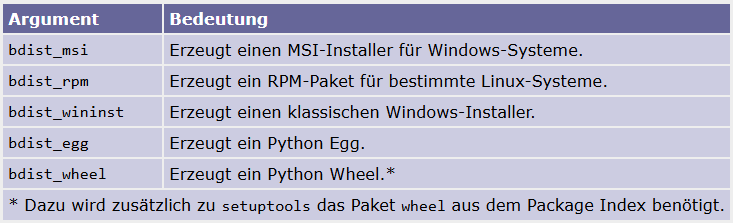

Da alle Informationen, die zum Erstellen der Binärdistribution benötigt werden, bereits im Installationsskript angegeben wurden, ist das Erzeugen einer Binärdistribution mit den folgenden Aufrufen von setup.py erledigt:
```
setup.py bdist_wininst
setup.py bdist_egg
```
**Hinweis:**  
Solange Ihr Projekt aus reinen Python-Modulen besteht, also weder Pakete noch Extensions umfasst, kann die Installationsdatei für Windows auch unter anderen Betriebssystemen, beispielsweise unter Linux, erzeugt werden. Sobald aber Pakete oder Erweiterungen enthalten sind, muss dafür ein Windows-System verwendet werden.

# Distributionen installieren  

Nachdem Sie jetzt das grundlegende Handwerkszeug zum Erstellen einer Binär- und Quellcodedistribution erhalten haben, sollen hier noch ein paar Worte zur Verwendung der Distributionen selbst folgen.

Zu einer Binärdistribution brauchen wir dabei nicht viel zu sagen, denn die Installationsprozedur entspricht dem auf dem jeweiligen Betriebssystem üblichen Vorgehen. Eggs oder Wheels können mit einem Paketmanager wie pip installiert werden.

Eine Quellcodedistribution wird ebenfalls über einen Aufruf von setup.py installiert:
```
setup.py install
```
Wenn die Programmdatei setup.py mit dem Argument install ausgeführt wird, installiert sie die Distribution in die Python-Umgebung, die auf dem System installiert ist. Beachten Sie, dass dafür je nach System Administrator- oder Root-Rechte erforderlich sind.

**Hinweis:**  
Die Distribution wird in das Standardverzeichnis für Python-Drittanbieterbibliotheken des Systems installiert. Wenn Sie dies nicht wünschen, können Sie über das Argument --prefix ein Zielverzeichnis vorgeben:
```
python setup.py install --prefix="Pfad/Zum/Zielverzeichnis"
```

## Eigenständige Distributionen erstellen  

Das Installieren einer Distribution, die mit setuptools erstellt wurde, setzt eine setuptools-Installation auf dem Zielrechner voraus. Da setuptools nicht in der Standardbibliothek enthalten ist und obwohl setuptools weit verbreitet ist, ist dies nicht garantiert.

Mithilfe des Bootstrap-Skripts ez_setup.py, über das sich setuptools installieren lässt, kann die Installation auch bei einer fehlenden setuptools-Installation durchgeführt werden. Dazu wird das Skript ez_setup.py aus dem **PyPI** heruntergeladen und in die Distribution aufgenommen. Das Installationsskript setup.py muss folgendermaßen beginnen:
```
import ez_setup
ez_setup.use_setuptools()
```
Auf diese Weise wird die Installation von setuptools angestoßen, noch bevor die eigentliche Distribution installiert wird.

## Erstellen von EXE-Dateien – cx_Freeze  

Mit dem setuptools-Paket lassen sich Distributionen aus Python-Projekten erzeugen, die dann auf dem Zielsystem im Kontext einer existierenden Python-Umgebung installiert werden können. Besonders unter Windows ist es manchmal wünschenswert, ein Programm als einfache ausführbare Datei auszuliefern, die ohne weitere Voraussetzungen auch auf Systemen läuft, auf denen keine Python-Umgebung installiert ist. Eine solche Distribution kann mit dem Drittanbietermodul cx_Freeze erstellt werden.(https://pypi.python.org/pypi/cx_Freeze/)

In diesem Abschnitt verwenden wir das Modul cx_Freeze, um aus einem kleinen Beispielprogramm eine ausführbare Datei zu schnüren. Hier sehen Sie zunächst den Quelltext des Beispielprogramms:
```
import sys
if len(sys.argv) > 2:
    print("Ergebnis: {}".format(int(sys.argv[1]) + int(sys.argv[2])))
```
Es handelt sich dabei um ein einfaches Programm, das zwei als Argument übergebene Zahlen addiert und das Ergebnis ausgibt.

Es gibt zwei Möglichkeiten, das Modul cx_Freeze zu verwenden: einmal über das Skript cxfreeze (Unter Windows und macOS finden Sie cxfreeze im Unterverzeichnis Scripts der Python-Installation. Unter Linux wird cxfreeze üblicherweise in das globale Systemverzeichnis für ausführbare Dateien installiert. ), dem der Pfad zur zu bearbeitenden Programmdatei als Argument übergeben werden muss, oder alternativ in Kombination mit setuptools. Dazu schreiben wir im Kontext des oben dargestellten Beispielprogramms die folgende Programmdatei setup.py:
```
from cx_Freeze import setup, Executable
setup(
     […]
     executables = [Executable("calc.py")]
     )
```
Anstelle der Auslassungszeichen stehen die üblichen Parameter der Funktion setup im Quellcode, über die beispielsweise der Name des Programms oder die E-Mail-Adresse des Autors angegeben werden kann. Um mit cx_Freeze eine ausführbare Datei zu erstellen, muss der Schlüsselwortparameter executables angegeben werden. Für diesen wird eine Liste von Executable-Instanzen übergeben, die jeweils eine zu erzeugende ausführbare Datei repräsentieren.

Nachdem das Installationsskript fertig ist, kann die ausführbare Datei erzeugt werden. Dazu muss das Installationsskript setup.py mit dem Argument build aufgerufen werden:
```
setup.py build
```
Jetzt werden automatisch die konfigurierten ausführbaren Dateien erzeugt. Dabei erzeugt cx_Freeze die für das jeweilige Betriebssystem nativen Formate. Es ist beispielsweise nicht möglich, unter Linux eine Windows-Executable zu erstellen.

Nachdem sich das Installationsskript beendet hat, finden Sie im Programmverzeichnis den Unterordner dist, der die fertige Distribution Ihres Python-Programms enthält. Diese beinhaltet nicht nur die ausführbare Datei selbst, in diesem Fall calc.exe, sondern noch weitere für das Programm benötigte Dateien. So sind beispielsweise der Python-Interpreter in der DLL python36.dll und die benötigten Teile der Standardbibliothek im Archiv library.zip ausgelagert.